# Análisis Exploratorio de Datos (EDA) - Tienda Online

Este notebook presenta un análisis exploratorio de ventas de una tienda online utilizando el dataset **Online Retail II**.
El objetivo es comprender el comportamiento de los clientes, patrones de ventas, productos destacados y oportunidades para optimizar las decisiones del negocio.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo gráfico
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13


## Carga y combinación de datos

Se cargan las dos hojas del archivo Excel correspondientes a los años 2009-2010 y 2010-2011, y luego se concatenan.


In [2]:
# Cargar el archivo Excel
file_path = "online_retail_II.xlsx"
xls = pd.ExcelFile(file_path)

# Leer hojas
df1 = xls.parse('Year 2009-2010')
df2 = xls.parse('Year 2010-2011')

# Agregar columna de año para identificar el origen
df1['Year'] = '2009-2010'
df2['Year'] = '2010-2011'

# Concatenar ambas hojas
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-2010
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-2010
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-2010
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-2010
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-2010


## Preprocesamiento de los datos

Se realiza limpieza y enriquecimiento del dataset:
- Eliminación de nulos irreparables.
- Creación de columnas útiles.
- Identificación de devoluciones.


In [3]:
# Eliminar filas sin Customer ID o Description
df.dropna(subset=['Customer ID', 'Description'], inplace=True)

# Limpiar y normalizar descripciones
df['Description'] = df['Description'].str.strip().str.lower()

# Convertir tipos y crear columnas útiles
df['Customer ID'] = df['Customer ID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['Price']
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceWeekday'] = df['InvoiceDate'].dt.day_name()
df['IsReturn'] = df['Invoice'].astype(str).str.startswith('C') | (df['Quantity'] < 0)

# Filtrar precios positivos
df = df[df['Price'] > 0]


## Productos más vendidos

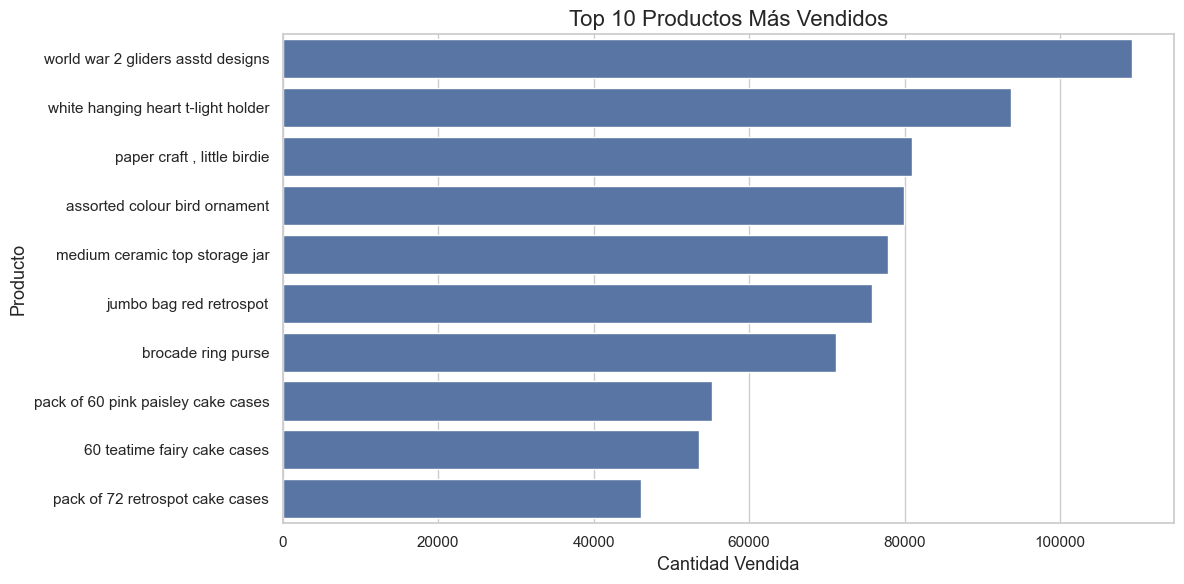

In [4]:
top_products = df[~df['IsReturn']].groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

## Productos que generan más ingresos

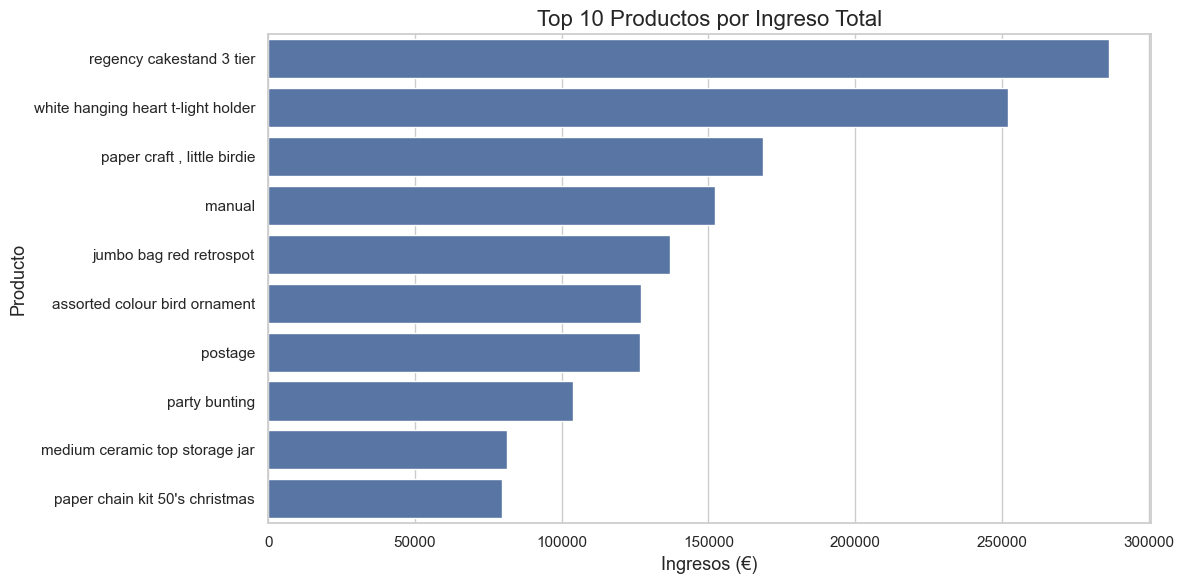

In [5]:
top_revenue = df[~df['IsReturn']].groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_revenue.values, y=top_revenue.index)
plt.title('Top 10 Productos por Ingreso Total')
plt.xlabel('Ingresos (€)')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

## Productos más devueltos

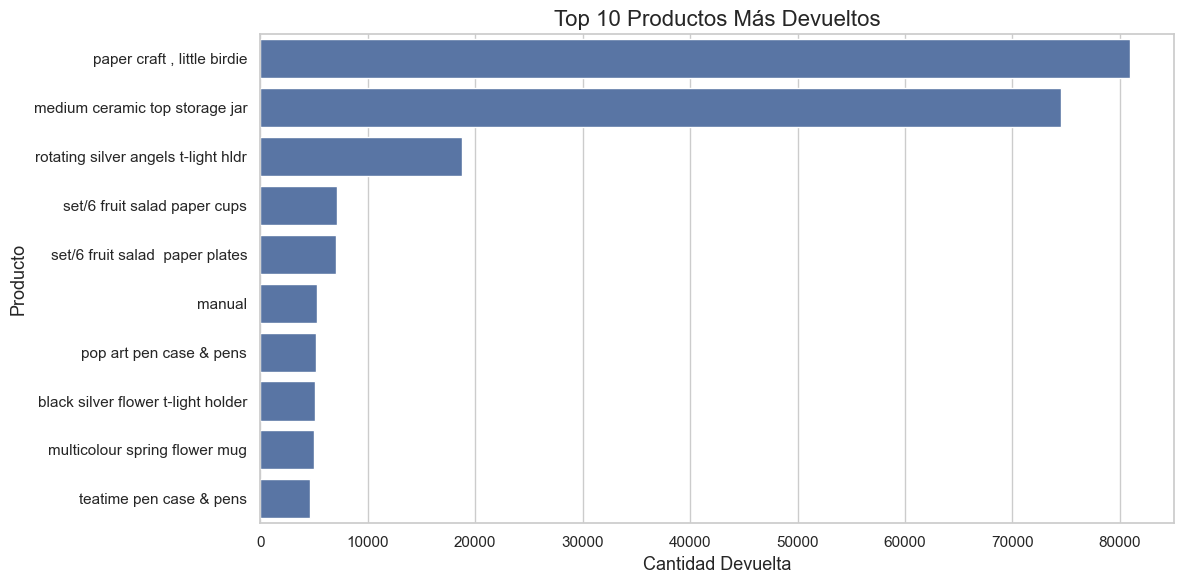

In [6]:
top_returns = df[df['IsReturn']].groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False).head(10)
sns.barplot(x=top_returns.values, y=top_returns.index)
plt.title('Top 10 Productos Más Devueltos')
plt.xlabel('Cantidad Devuelta')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

## Ingresos por país

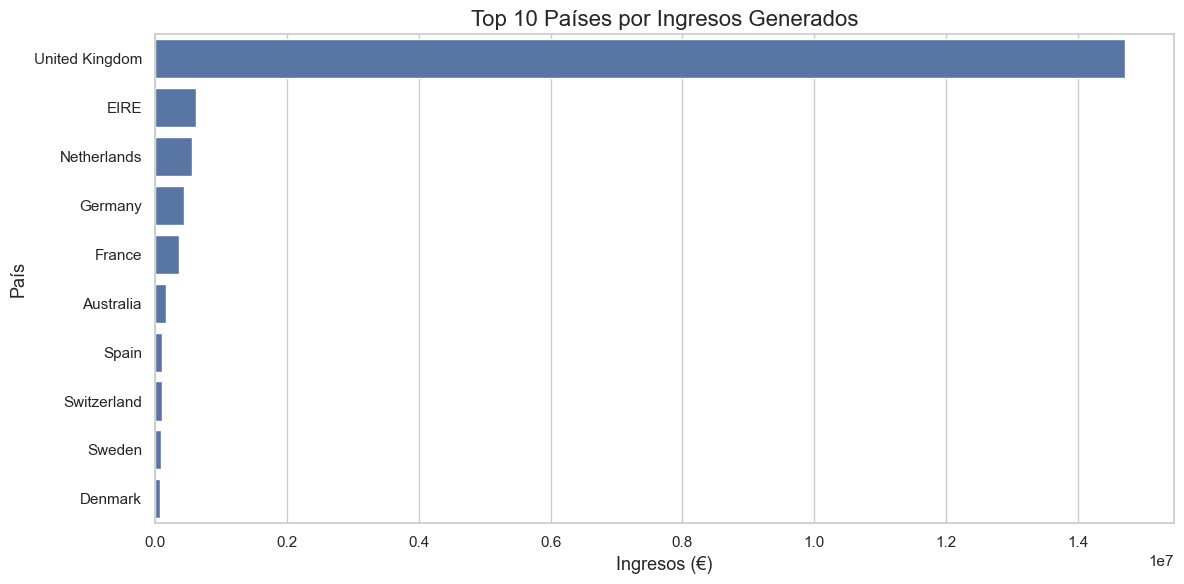

In [7]:
revenue_country = df[~df['IsReturn']].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=revenue_country.values, y=revenue_country.index)
plt.title('Top 10 Países por Ingresos Generados')
plt.xlabel('Ingresos (€)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

## Porcentaje de devoluciones por país

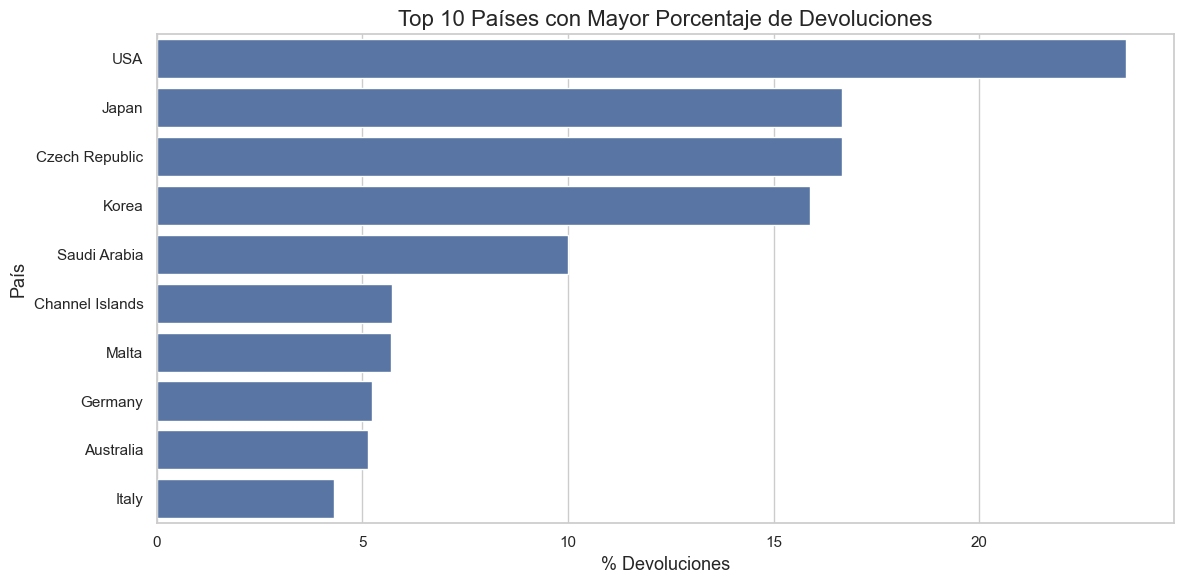

In [8]:
returns_ratio = df.groupby('Country')['IsReturn'].mean().sort_values(ascending=False).head(10) * 100
sns.barplot(x=returns_ratio.values, y=returns_ratio.index)
plt.title('Top 10 Países con Mayor Porcentaje de Devoluciones')
plt.xlabel('% Devoluciones')
plt.ylabel('País')
plt.tight_layout()
plt.show()

## Estacionalidad - Ventas por mes

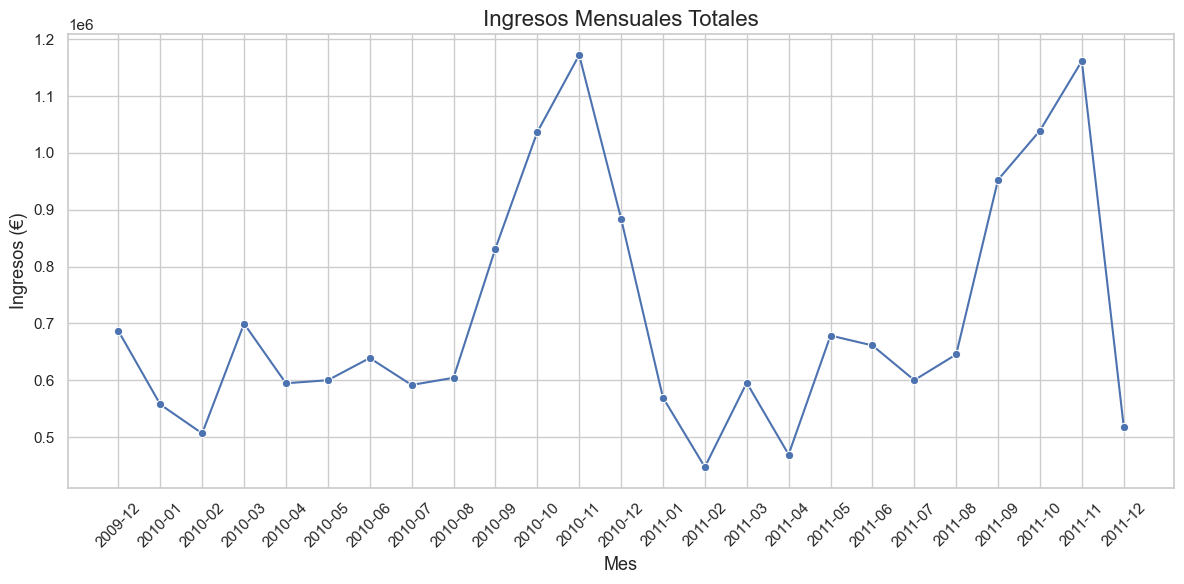

In [9]:
monthly_sales = df[~df['IsReturn']].groupby(['InvoiceYear', 'InvoiceMonth'])['TotalPrice'].sum().reset_index()
monthly_sales['Mes'] = monthly_sales['InvoiceYear'].astype(str) + '-' + monthly_sales['InvoiceMonth'].astype(str).str.zfill(2)
sns.lineplot(x='Mes', y='TotalPrice', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Ingresos Mensuales Totales')
plt.xlabel('Mes')
plt.ylabel('Ingresos (€)')
plt.tight_layout()
plt.show()

## Ventas por día de la semana

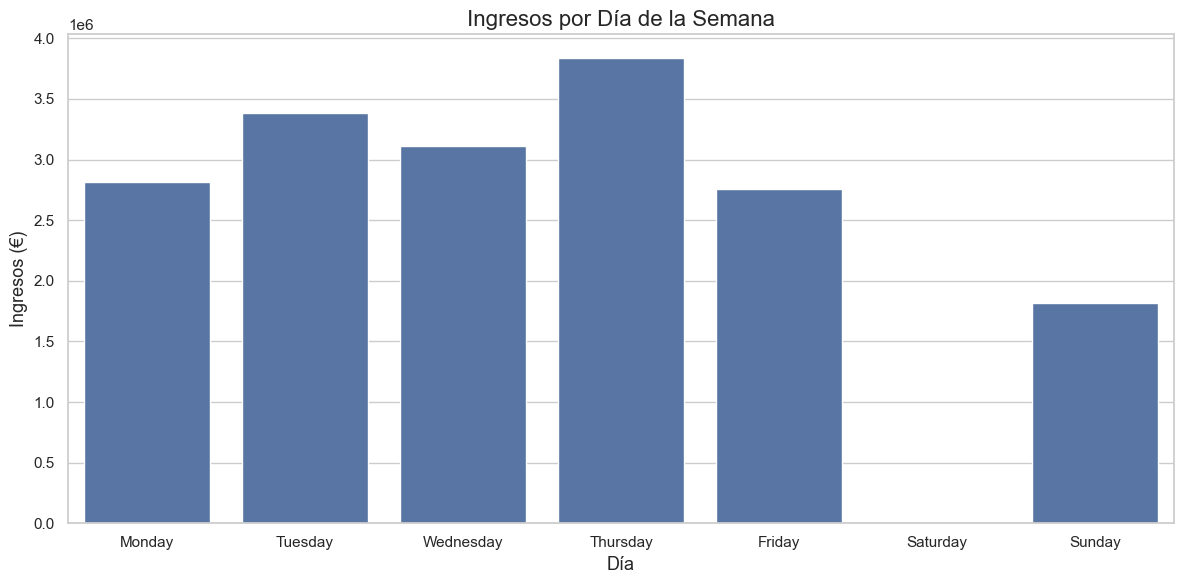

In [10]:
weekday_sales = df[~df['IsReturn']].groupby('InvoiceWeekday')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Ingresos por Día de la Semana')
plt.xlabel('Día')
plt.ylabel('Ingresos (€)')
plt.tight_layout()
plt.show()

## Estadísticas descriptivas generales

In [11]:
# Estadísticas para variables numéricas
df[['Quantity', 'Price', 'TotalPrice']].describe()

,Quantity,Price,TotalPrice
count,824293.000000,824293.000000,824293.000000
mean,12.397744,3.677116,20.197057
std,188.477954,70.244404,308.698238
min,-80995.000000,0.001000,-168469.600000
25%,2.000000,1.250000,4.250000
50%,5.000000,1.950000,11.250000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


## Estadísticas descriptivas por país

In [12]:
# Promedios por país
grouped_country = df.groupby('Country')[['Quantity', 'Price', 'TotalPrice']].agg(['mean', 'median', 'std'])
grouped_country.head(10)

Quantity                         Price                    \
                       mean median          std      mean median        std   
Country                                                                       
Australia         54.135079   16.0    87.278770  4.246634   1.85  26.875778   
Austria           12.053305   10.0    16.957079  4.460896   1.69  10.286535   
Bahrain           12.796610    8.0    14.857692  2.890000   1.65   2.732939   
Belgium           11.249840   10.0    12.992581  4.729942   1.95  38.625515   
Brazil             5.797872    3.0     6.899556  2.726702   1.95   2.317098   
Canada            16.039474   12.0    38.258030  4.640746   1.65  36.407783   
Channel Islands   12.303486    8.0    24.701121  5.442788   2.10  25.809312   
Cyprus             9.088435    5.0    21.546324  5.386012   2.95  16.866405   
Czech Republic    19.733333   24.0    22.813990  2.938333   1.45   7.098840   
Denmark          287.904529   16.0  1431.007732  2.934994   1.69   3.675303   

                TotalPrice                      
                      mean  median         std  
Country                                         
Australia        87.502131  30.240  142.156114  
Austria          24.709595  17.000   34.030870  
Bahrain          22.955424  17.880   18.505610  
Belgium          20.363386  16.600   42.210780  
Brazil           15.019894   5.575   24.370216  
Canada           21.416842  15.300   49.965088  
Channel Islands  24.912025  17.400   54.940967  
Cyprus           20.546548  15.300   31.775834  
Czech Republic   23.590667  25.300   26.302604  
Denmark          80.466450  25.920  262.112354

## Distribución de precios

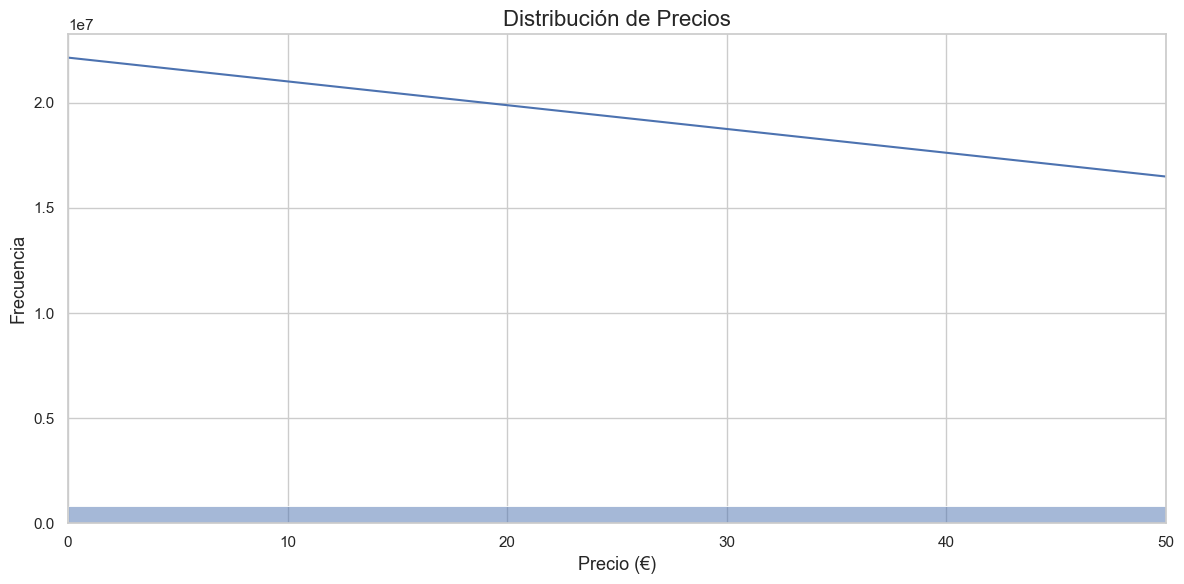

In [13]:
sns.histplot(df['Price'], bins=100, kde=True)
plt.xlim(0, 50)
plt.title('Distribución de Precios')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Distribución de TotalPrice por orden

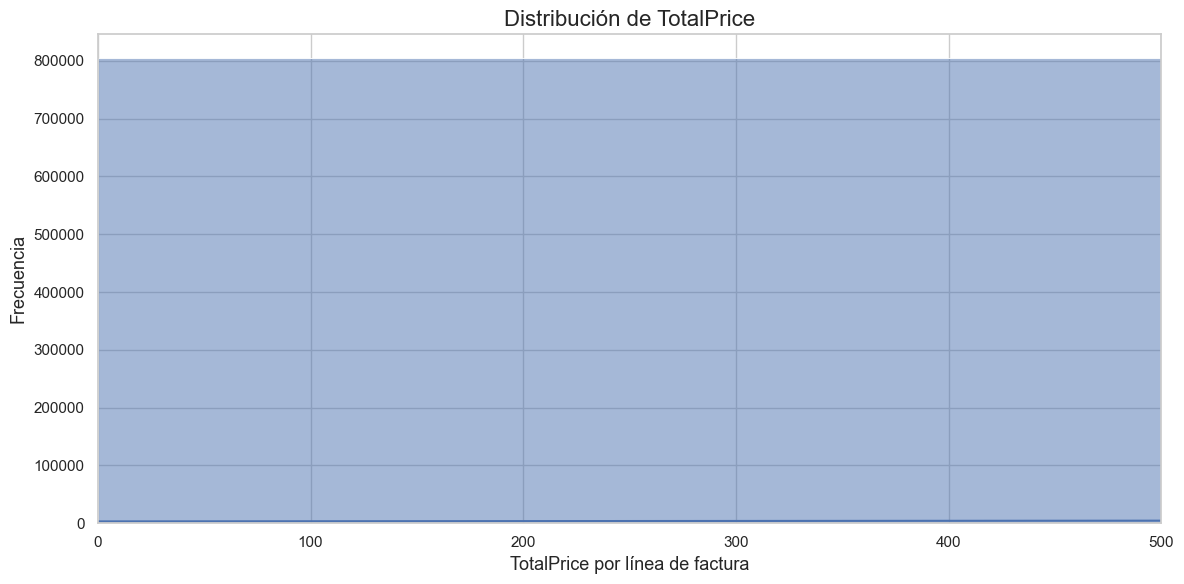

In [14]:
sns.histplot(df['TotalPrice'], bins=100, kde=True)
plt.xlim(0, 500)
plt.title('Distribución de TotalPrice')
plt.xlabel('TotalPrice por línea de factura')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Detección de outliers

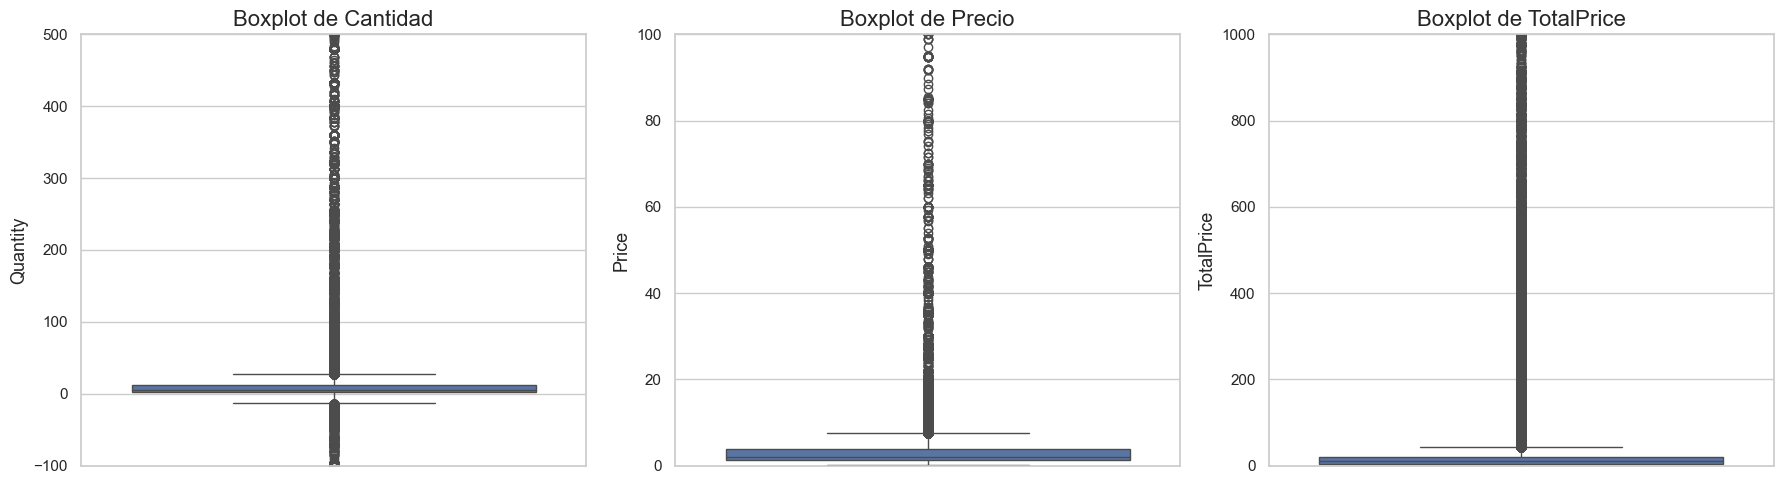

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df['Quantity'], ax=axs[0])
axs[0].set_title('Boxplot de Cantidad')
axs[0].set_ylim(-100, 500)

sns.boxplot(y=df['Price'], ax=axs[1])
axs[1].set_title('Boxplot de Precio')
axs[1].set_ylim(0, 100)

sns.boxplot(y=df['TotalPrice'], ax=axs[2])
axs[2].set_title('Boxplot de TotalPrice')
axs[2].set_ylim(0, 1000)

plt.tight_layout()
plt.show()

## Correlación entre variables

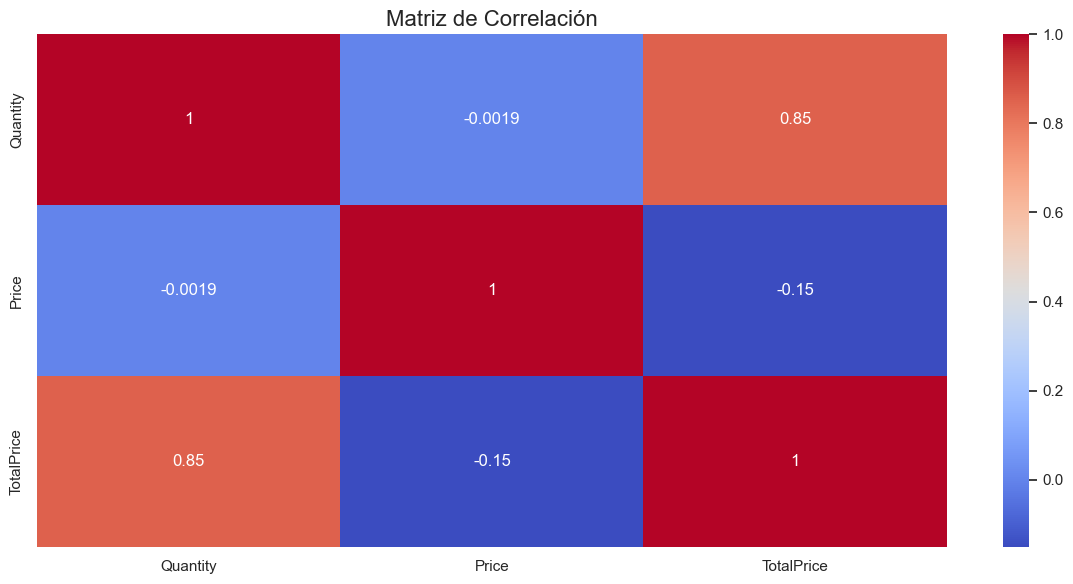

In [16]:
sns.heatmap(df[['Quantity', 'Price', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

## Gasto medio por país

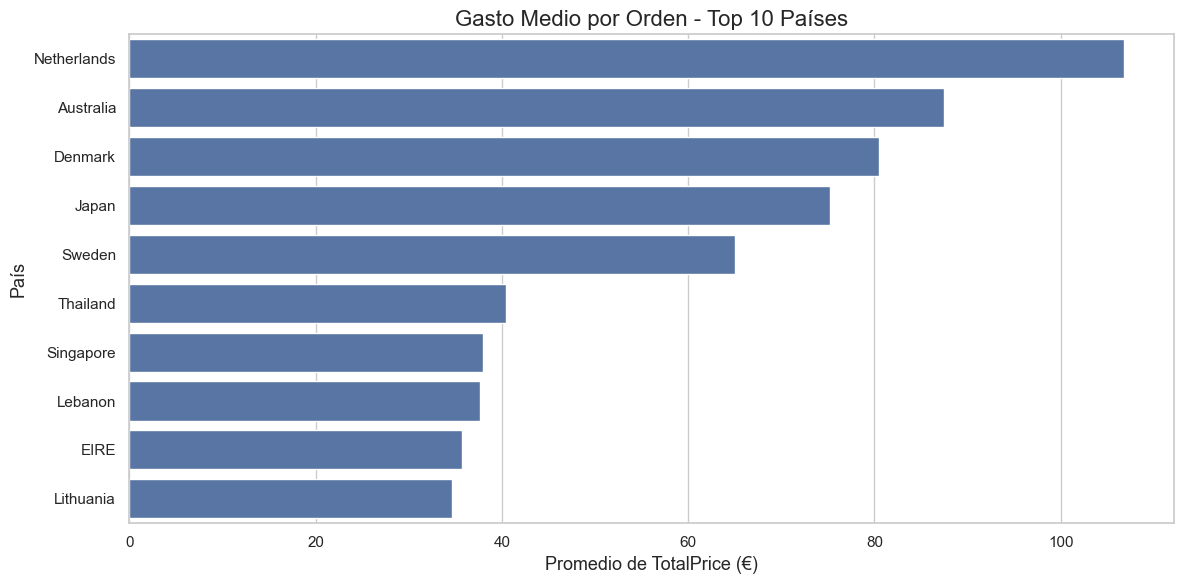

In [17]:
avg_price_per_country = df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price_per_country.values, y=avg_price_per_country.index)
plt.title('Gasto Medio por Orden - Top 10 Países')
plt.xlabel('Promedio de TotalPrice (€)')
plt.ylabel('País')
plt.tight_layout()
plt.show()